https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17

In [1]:
from Database import db_mongo
from Utilities import clean_text

import string

db = db_mongo.db_mongo()

df_base = db.get_text_full_resume(100000000)

df_base = df_base.sample(frac=1).reset_index(drop=True)

ct = clean_text.CleanText()

df_base['text'] = ct.cleanner_process(df_base["text"])

df = df_base.copy()

Init DB


[nltk_data] Downloading package wordnet to /home/kguttas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_base["class"].unique()

array(['CHEF', 'BUSINESS-DEVELOPMENT', 'DESIGNER', 'CONSTRUCTION',
       'APPAREL', 'FITNESS', 'INFORMATION-TECHNOLOGY', 'AVIATION',
       'TEACHER', 'ADVOCATE', 'AGRICULTURE', 'BANKING', 'DIGITAL-MEDIA',
       'ACCOUNTANT', 'ARTS', 'SALES', 'ENGINEERING', 'FINANCE', 'HR',
       'CONSULTANT', 'PUBLIC-RELATIONS', 'BPO', 'AUTOMOBILE',
       'HEALTHCARE'], dtype=object)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
from chart_studio import plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

2021-12-07 17:35:16.196075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 17:35:16.196129: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
df_base['class'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Resumes', 
                                                                title='Number resumes in each class')

In [5]:
def print_plot(index):
    example = df[df.index == index][['text', 'class']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Class:', example[1])

In [6]:
print_plot(10)

corpor facilit perform coach develop summari corpor trainer perform coach over year busi experi includ year train interact engag high energi corpor trainer wide bandwidth corpor entrepreneuri experi solidifi content enabl materi busi relev lead other adopt chang with proven method skill engag group quickli build trust involv ensur particip improv relat compet coach other higher level peak perform while maintain confidenti privaci core qualif activ particip group plan event excel classroom manag interact teachinglearn clear public speak skill activ listen skill posit atmospher promot innov lesson plan perform ass achiev facilit million innov cost save client facilit train revenu obtain four dale carnegi certif year consist receiv exce train evalu coach profil intern incorpor ass increas behavior chang profession experi corpor facilit perform coach develop januari current compani name citi state collabor with senior leadership team tailor train manag design develop implement administr in

In [7]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['text'] = df['text'].apply(clean_text)

In [8]:
df['text'] = df['text'].str.replace('\d+', '')

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [9]:
print_plot(10)

corpor facilit perform coach develop summari corpor trainer perform coach year busi eperi includ year train interact engag high energi corpor trainer wide bandwidth corpor entrepreneuri eperi solidifi content enabl materi busi relev lead adopt chang proven method skill engag group quickli build trust involv ensur particip improv relat compet coach higher level peak perform maintain confidenti privaci core qualif activ particip group plan event ecel classroom manag interact teachinglearn clear public speak skill activ listen skill posit atmospher promot innov lesson plan perform ass achiev facilit million innov cost save client facilit train revenu obtain four dale carnegi certif year consist receiv ece train evalu coach profil intern incorpor ass increas behavior chang profession eperi corpor facilit perform coach develop januari current compani name citi state collabor senior leadership team tailor train manag design develop implement administr instructorl corpor train includ feedback

In [10]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 1000
# This is fixed.
EMBEDDING_DIM = 80

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 34985 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2484, 1000)


In [12]:
Y = pd.get_dummies(df['class']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (2484, 24)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1987, 1000) (1987, 24)
(497, 1000) (497, 24)


In [14]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2048, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1048, activation="relu"))
model.add(Dense(Y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 80)          8000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 80)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               72400     
                                                                 
 dense (Dense)               (None, 2048)              206848    
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1048)              2147352   
                                                        

2021-12-07 17:35:19.328186: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-07 17:35:19.328223: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-07 17:35:19.328240: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu): /proc/driver/nvidia/version does not exist
2021-12-07 17:35:19.328415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
epochs = 40
batch_size = 256

history = model.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0000001)])


Epoch 1/40
7/7 [==============================] - 21s 3s/step - loss: 3.1723 - accuracy: 0.0403 - val_loss: 3.1602 - val_accuracy: 0.0452
Epoch 2/40
7/7 [==============================] - 20s 3s/step - loss: 3.1404 - accuracy: 0.0688 - val_loss: 3.1414 - val_accuracy: 0.0452
Epoch 3/40
7/7 [==============================] - 19s 3s/step - loss: 3.1011 - accuracy: 0.0828 - val_loss: 3.0717 - val_accuracy: 0.1055
Epoch 4/40
7/7 [==============================] - 18s 3s/step - loss: 2.9055 - accuracy: 0.1633 - val_loss: 2.8622 - val_accuracy: 0.1357
Epoch 5/40
7/7 [==============================] - 20s 3s/step - loss: 2.6752 - accuracy: 0.1862 - val_loss: 2.6581 - val_accuracy: 0.1809
Epoch 6/40
7/7 [==============================] - 20s 3s/step - loss: 2.3802 - accuracy: 0.2763 - val_loss: 2.6127 - val_accuracy: 0.2211
Epoch 7/40
7/7 [==============================] - 18s 3s/step - loss: 2.0728 - accuracy: 0.3702 - val_loss: 2.6311 - val_accuracy: 0.2513
Epoch 8/40
7/7 [==================

In [16]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 3s 165ms/step - loss: 5.3972 - accuracy: 0.2414
Test set
  Loss: 5.397
  Accuracy: 0.241


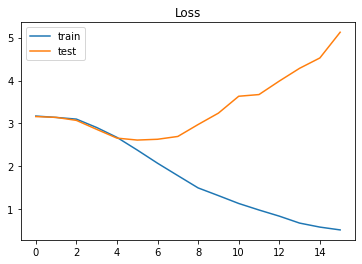

In [17]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

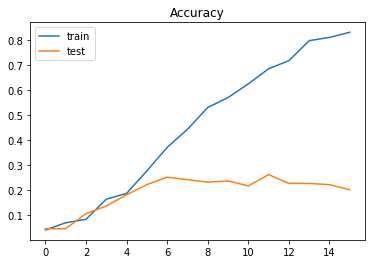

In [18]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [19]:
df_base["text"].iloc[64]
df_base["class"].iloc[64]

'digit advertis oper intern skill custom support multitask gener comput repair skill skill other organ involv adob creativ suit photoshop indesign microsoft offic googl doc profici social medium facebook twitter tumblr instagram extens histori knowledg studio fluent american sign languag experi citi state digit advertis oper intern assist digit advertis oper manag with daili task includ pull metric open sent click through rate total impress launch coordin finish with client creat schedul newslett promot travel food email post blog adjust copi make correct need site content includ directori also complet outlin video seri magazin with other intern skillsknowledg acquir doubl click publish googl analyt wordpress live intent hubspot compani name citi state assist student with comput need both desktop laptop basic support repair check student monitor student ensur safeti rule complianc restock print suppli perform basic printer repair need ensur clean organ facil compani name citi state sup

'DIGITAL-MEDIA'

In [20]:
new_complaint = [df_base["text"].iloc[607]]

seq = tokenizer.texts_to_sequences(new_complaint)

padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)

labels = df_base["class"].unique()
print(pred, labels[np.argmax(pred)])

[[2.9848302e-03 1.3709505e-04 2.2514266e-07 4.8237297e-08 1.8852725e-10
  1.0251140e-05 2.3452677e-07 3.2567047e-02 8.0890131e-06 2.6324597e-06
  1.0785384e-13 8.2813487e-05 5.6074099e-03 3.1272349e-10 1.0899228e-09
  2.0101309e-07 9.5653397e-01 1.3251318e-07 2.0954698e-04 1.8553524e-03
  1.8786938e-07 4.7920938e-11 1.7588071e-09 9.7007624e-10]] ENGINEERING
